In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

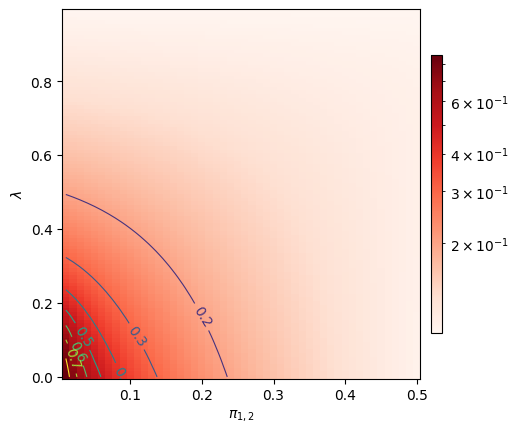

In [25]:
# single plot:
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(figsize=(5.6,4.8))
logColorbar = True
if logColorbar:
    zLim = [np.min(fsMesh['fs'][0]), np.max(fsMesh['fs'][0])]
    im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], cmap='Reds', shading='nearest', norm = LogNorm(vmin=zLim[0], vmax=zLim[-1]))
else:
    im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], cmap='Reds', shading='nearest')
con = ax.contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][0], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
ax.clabel(con)
ax.set_xlabel('$\pi_{1,2}$')
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)

## fs side by side

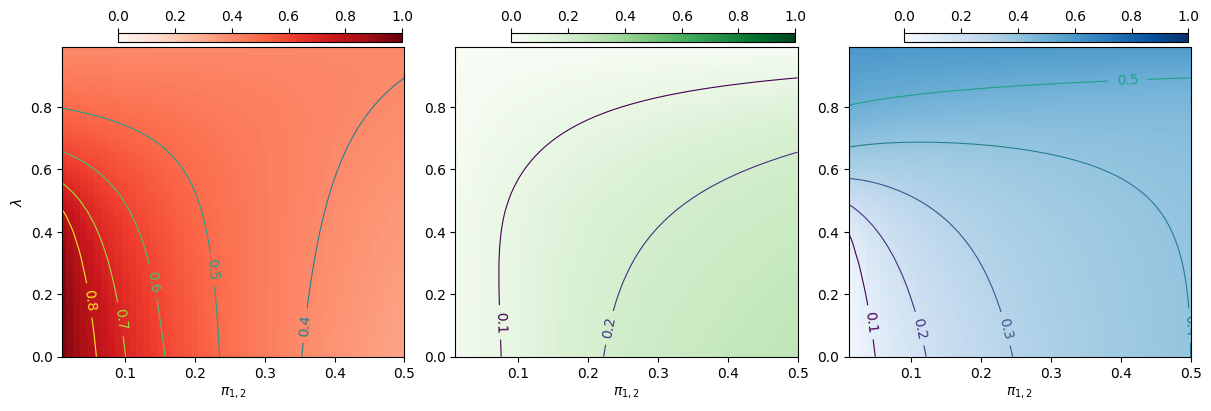

In [42]:
x = 2
q1, q2 = 1.75, 2.5
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(1,3,figsize=(12, 4), constrained_layout=True)
fs_cmaps = ['Reds', 'Greens', 'Blues']

for i in range(3):
    ax[i].set_xlim(0.01, 0.5)
    ax[i].set_ylim(0.00, 0.99)
    ax[i].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

for i,cmap in enumerate(fs_cmaps):
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], vmin =0, vmax =1, cmap=cmap, shading='nearest', rasterized=True)
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], linewidths=0.8)
    fig.colorbar(im, ax=ax[i], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
    ax[i].clabel(con)

fig.savefig(f'fs_cmaps_isolines_sym_pi_q1_{q1}_q2_{q2}.png')


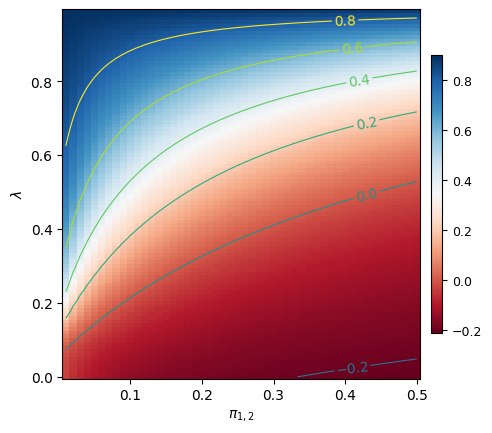

In [41]:
# single Q plot:
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(figsize=(5.6,4.8))
logColorbar = False
zLim = [np.min(Qmesh), np.max(Qmesh)]
if logColorbar:
    im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, cmap='RdBu', shading='nearest', norm = LogNorm(vmin=zLim[0], vmax=zLim[-1]))
else:
    im = ax.pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1])
con = ax.contour(fsMesh['x'], fsMesh['y'], Qmesh, levels=[-0.8, -0.6, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8], linewidths=0.8)
ax.clabel(con)
ax.set_xlabel('$\pi_{1,2}$')
ax.set_ylabel('$\lambda$')
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)
cb.ax.tick_params(labelsize=9)
fig.savefig(f'Q_cmap_isolines_sym_pi_q1_{q1}_q2_{q2}.png')